# **COVID 19 - DATA SCIENCE PROJECT**

<u style="font-weight:600; font-size: 18px;">Objectif du projet :</u> À partir de l'ensemble de données à notre disposition, nous souhaitons mettre en place un modèle de Machine Learning capable de prédire si une personne est infectée ou pas.

<u style="font-weight:600; font-size: 18px;">Métriques :</u> Accuracy → 90%

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas import concat

Importation des données

In [60]:
df_original = pd.read_excel('./datasets/dataset.xlsx')
df_original.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

Au premier coup d'œil du dataset, on remarque que :
- Le nom de chaque colonne est sous un mauvais format
- Certaines colonnes semblent ne contenir que des valeurs manquantes NaN
- La colonne target est 'SARS-Cov-2 exam result'

## Exploratory Data Analysis (EDA)

In [61]:
df = df_original.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

- Dimensions du dataset

In [62]:
print(f"Nombre de colonnes : {df.shape[1]}\nNombre de lignes : {df.shape[0]}")

Nombre de colonnes : 111
Nombre de lignes : 5644


**Remarque :** Nous avons un grand nombre de variables, il faudra donc réduire la dimensionnalité

- Formatage du nom des colonnes

In [63]:
def format_col_name(col_name_ : str) -> str:
    """
    Formats a column name by converting it to lowercase, replacing spaces with underscores,
    and trimming unnecessary whitespace. If the input contains a parenthesis, the function
    only processes the substring before the parenthesis.

    :param col_name_: The name of the column to be formatted.
    :return: The formatted column name with spaces replaced by underscores and converted
        to lowercase.
    """
    if col_name_.find('(') == -1:
        return col_name_.strip(' ').replace(' ', '_').lower()
    return col_name_[ :col_name_.find('(')].strip(' ').replace(' ', '_').lower()

In [64]:
df.rename(columns={col : format_col_name(col) for col in df.columns}, inplace=True)

In [65]:
df.columns

Index(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward',
       'patient_addmited_to_semi-intensive_unit',
       'patient_addmited_to_intensive_care_unit', 'hematocrit', 'hemoglobin',
       'platelets', 'mean_platelet_volume',
       ...
       'hb_saturation', 'pco2', 'base_excess', 'ph', 'total_co2', 'hco3',
       'po2', 'arteiral_fio2', 'phosphor', 'cto2'],
      dtype='object', length=111)

- Types de variables

In [66]:
df.dtypes.sort_values()

patient_age_quantile                         int64
patient_addmited_to_regular_ward             int64
patient_addmited_to_semi-intensive_unit      int64
patient_addmited_to_intensive_care_unit      int64
cto2                                       float64
                                            ...   
urine_-_bile_pigments                       object
urine_-_ketone_bodies                       object
urine_-_nitrite                             object
urine_-_protein                             object
strepto_a                                   object
Length: 111, dtype: object

In [67]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

- Valeurs manquantes NaN

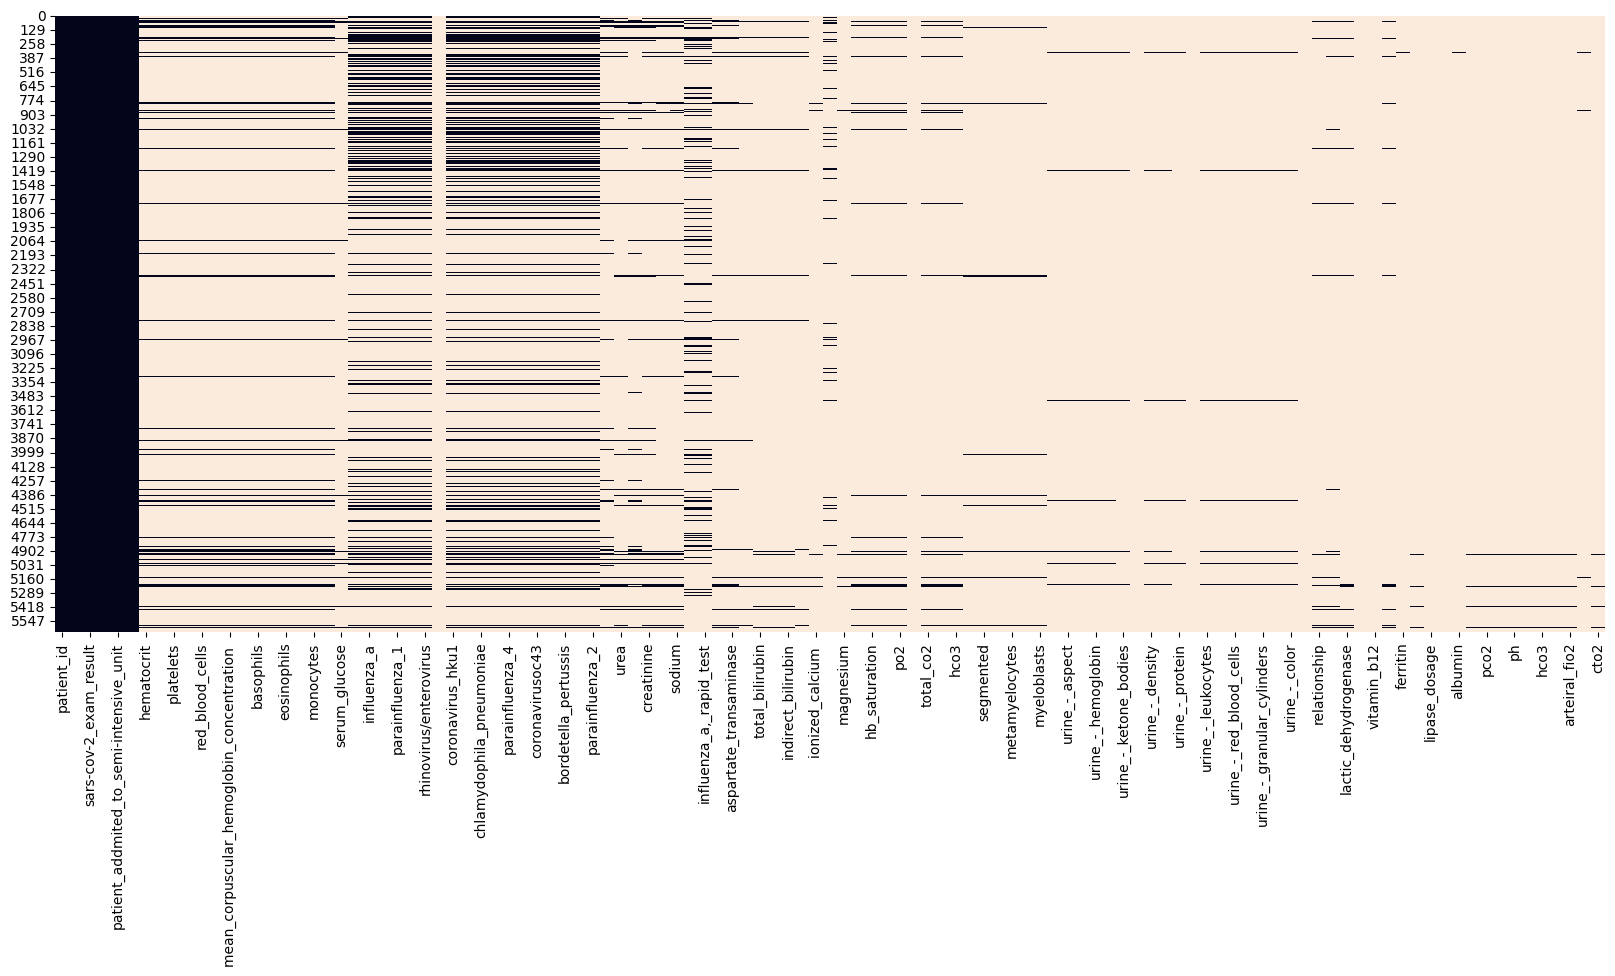

In [68]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [69]:
columns_NaN = (df.isnull().sum() * 100 / df.shape[0]).round(2).sort_values()
columns_NaN

patient_id                                   0.0
patient_age_quantile                         0.0
sars-cov-2_exam_result                       0.0
patient_addmited_to_regular_ward             0.0
patient_addmited_to_semi-intensive_unit      0.0
                                           ...  
mycoplasma_pneumoniae                      100.0
urine_-_sugar                              100.0
prothrombin_time                           100.0
partial_thromboplastin_time                100.0
d-dimer                                    100.0
Length: 111, dtype: float64

**Remarque :**
1. Une bonne partie des colonnes/variables ont plus de 90% de valeurs manquantes ; Du coup, on va les supprimer dans un premier temps, parce qu'à ce stade, on ne peut rien de plus pour récupérer ce trop-plein de valeurs manquantes.
2. Certains groupes de variables ont des valeurs manquantes pour les mêmes lignes ; Cela laisse penser que ces variables ont un lien entre elles.

- **Groupe A de variables avec 76% de NaN:** influenza_b, influenza_a, respiratory_syncytial_virus, parainfluenza_1, rhinovirus/enterovirus, coronavirus_hku1, chlamydophila_pneumoniae, coronavirusnl63, parainfluenza_3, adenovirus, inf_a_h1n1_2009, parainfluenza_2, metapneumovirus, bordetella_pertussis, coronavirus229e, coronavirusoc43, parainfluenza_4

- **Groupe B de variables avec 85% de NaN:** influenza_a,_rapid_test, influenza_b,_rapid_test

- **Groupe C de variables avec 89% de NaN:** hemoglobin, hematocrit, leukocytes, mean_corpuscular_hemoglobin_concentration, lymphocytes, red_blood_cells, basophils, platelets, eosinophils, mean_corpuscular_hemoglobin, red_blood_cell_distribution_width, mean_corpuscular_volume, monocytes, mean_platelet_volume

<table>
    <tr>
        <th style="text-align:left;">Groupe</th>
        <th style="text-align:left;">Signification</th>
    </tr>
    <tr>
        <td style="text-align:left; width: 100px;">Groupe A</td>
        <td style="text-align:left;">Virus et bactéries responsables d'infections respiratoires aiguës</td>
    </tr>
    <tr>
        <td style="text-align:left; width: 100px;">Groupe B</td>
        <td style="text-align:left;">Résultats de tests rapides (antigéniques) permettant de détecter la présence des virus de la grippe A ou de la grippe B dans un prélèvement respiratoire (comme un prélèvement nasal ou nasopharyngé).</td>
    </tr>
    <tr>
        <td style="text-align:left; width: 100px;">Groupe C</td>
        <td style="text-align:left;">Paramètres d’un hémogramme complet (ou numération formule sanguine, NFS), un examen sanguin de routine qui évalue les cellules du sang.</td>
    </tr>
</table>

**En savoir plus...**

* Virus respiratoires courants<br>
`influenza_a, influenza_b, inf_a_h1n1_2009` : virus de la grippe, dont la souche pandémique H1N1 de 2009.<br>
`respiratory_syncytial_virus (RSV)` : principal virus des bronchiolites chez le nourrisson. <br>
`rhinovirus/enterovirus` : causes fréquentes du rhume banal, mais aussi de bronchiolites et exacerbations d’asthme. <br>
`coronavirus_hku1, coronavirusnl63, coronavirus229e, coronavirusoc43` : coronavirus saisonniers (non liés au SARS-CoV-2), responsables de rhumes. <br>
`parainfluenza_1, parainfluenza_2, parainfluenza_3, parainfluenza_4` : virus associés à la croup (laryngite), bronchites et bronchiolites. <br>
`metapneumovirus` : proche du VRS, cause des infections respiratoires chez les jeunes enfants et les personnes âgées. <br>
`adenovirus` : peut provoquer des infections respiratoires, oculaires ou digestives, parfois sévères. <br>

* Bactéries respiratoires<br>
`chlamydophila_pneumoniae (anciennement Chlamydia pneumoniae)` : bactérie pouvant causer des pneumonies ou bronchites atypiques. <br>
`bordetella_pertussis` : agent de la coqueluche (toux convulsive), surtout chez l’enfant, mais aussi chez l’adulte.<br>

* Globules rouges (érythrocytes) et transport de l’oxygène<br>
`hemoglobin (Hb)` : Protéine transportant l’oxygène dans les globules rouges.<br>
`hematocrit (Hct)` : Proportion de sang occupée par les globules rouges (%).<br>
`red_blood_cells (RBC)` : Nombre de globules rouges par volume de sang.<br>
`mean_corpuscular_volume (MCV)` : Volume moyen d’un globule rouge (microcytaire, normocytaire, macrocytaire).<br>
`mean_corpuscular_hemoglobin (MCH)` : Quantité moyenne d’hémoglobine par globule rouge.<br>
`mean_corpuscular_hemoglobin_concentration (MCHC)` : Concentration moyenne d’hémoglobine dans les globules rouges.<br>
`red_blood_cell_distribution_width (RDW)` : Variation de la taille des globules rouges (hétérogénéité).<br>

* Globules blancs (leucocytes) et système immunitaire<br>
`leukocytes (WBC)` : Nombre total de globules blancs (défense contre les infections).<br>
`lymphocytes, monocytes, eosinophils, basophils` : Sous-types de globules blancs, chacun impliqué dans des réponses immunitaires spécifiques (virus, allergies, parasites, inflammation).<br>

* Plaquettes (thrombocytes) et coagulation<br>
`platelets` : Nombre de plaquettes, essentielles pour la coagulation sanguine.<br>
`mean_platelet_volume (MPV)` : Taille moyenne des plaquettes, indicateur de leur activité ou production.<br>

In [70]:
df = df.drop(columns=[col for col, val in zip(columns_NaN.index, columns_NaN.values) if val > 90])

In [71]:
df = df.drop(columns='patient_id')

- Visualisation des features

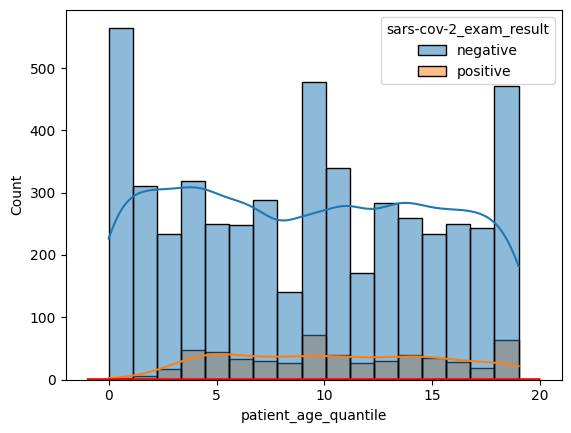

In [72]:
from scipy.stats import norm

sns.histplot(df, x="patient_age_quantile", hue="sars-cov-2_exam_result", kde=True)

# Courbe de la distribution normale de cette feature
mu, std = norm.fit(df["patient_age_quantile"])
x_min, x_max = plt.xlim()
x_kde = np.linspace(x_min, x_max, df["patient_age_quantile"].count())
p = norm.pdf(x_kde, mu, std)

plt.plot(x_kde, p, linewidth=2, color="red")

plt.show()

1. Variable difficile à interpreter, car manque d'infos sur l'échelle réelle des âges.
2. Pas de distribution normale ou de forme particulière ici.

Variables continues

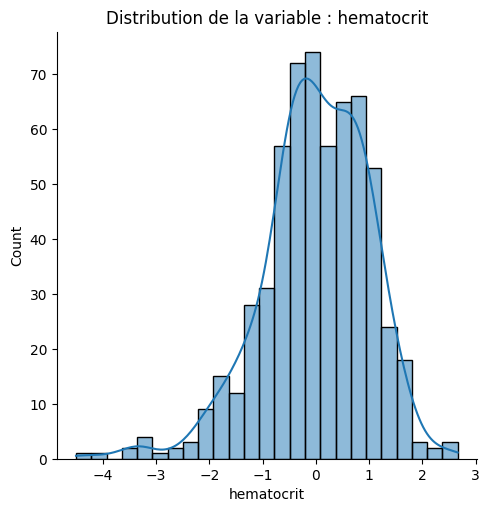

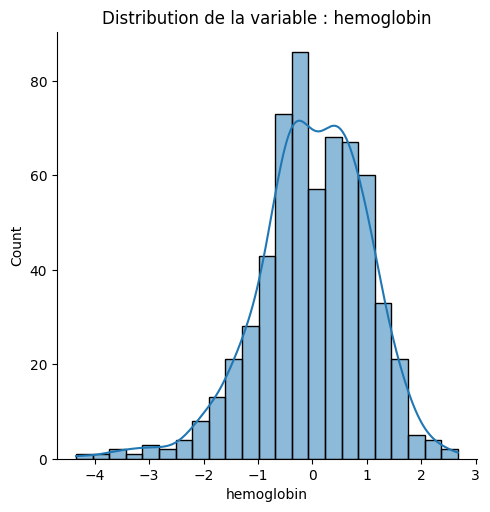

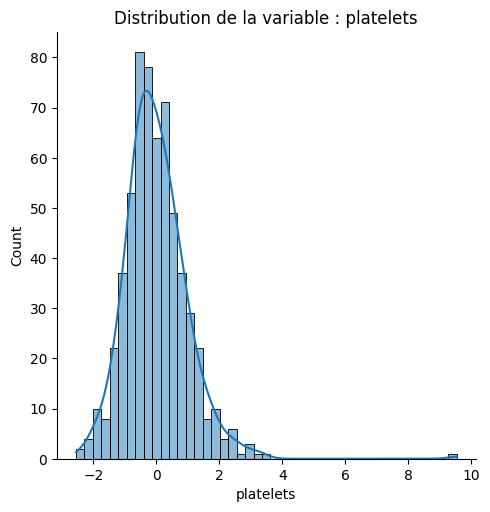

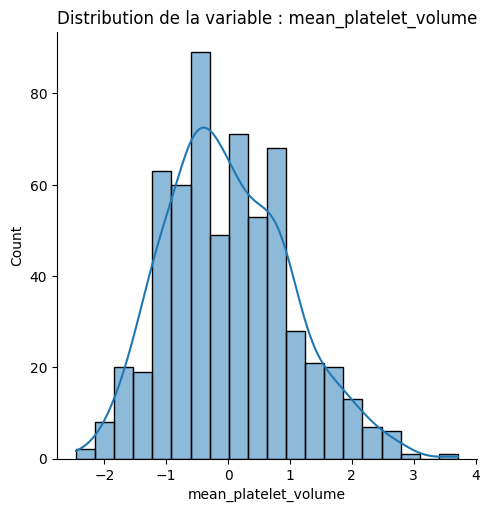

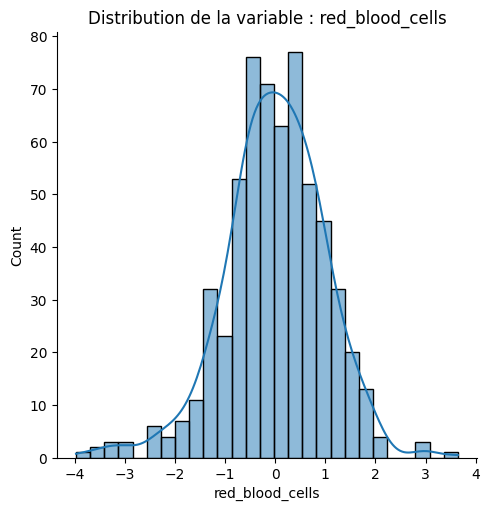

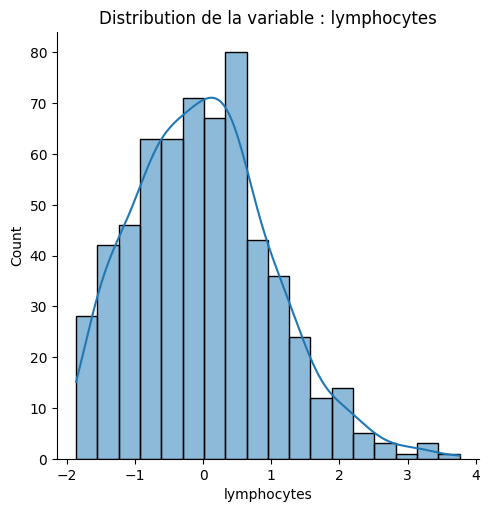

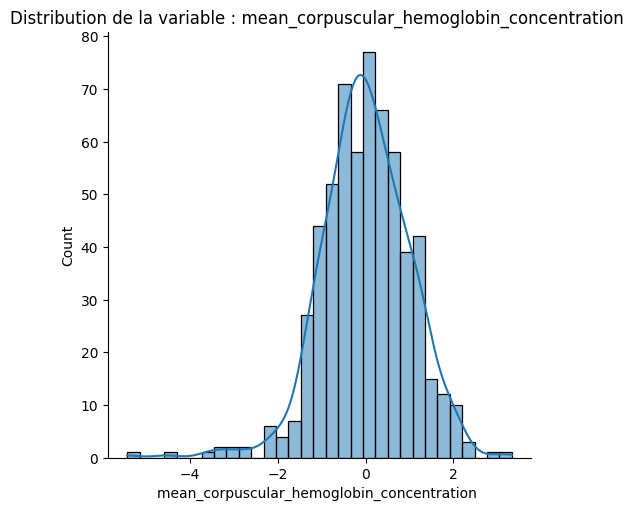

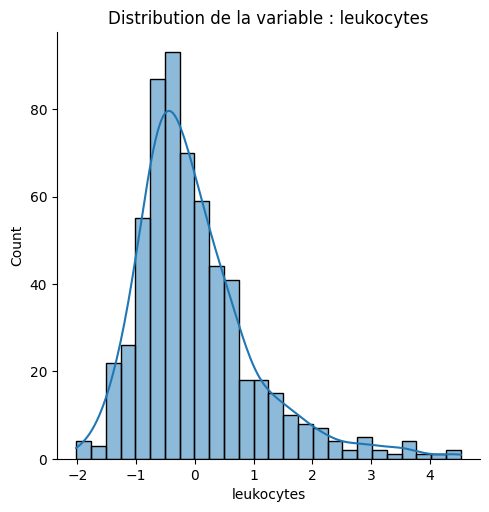

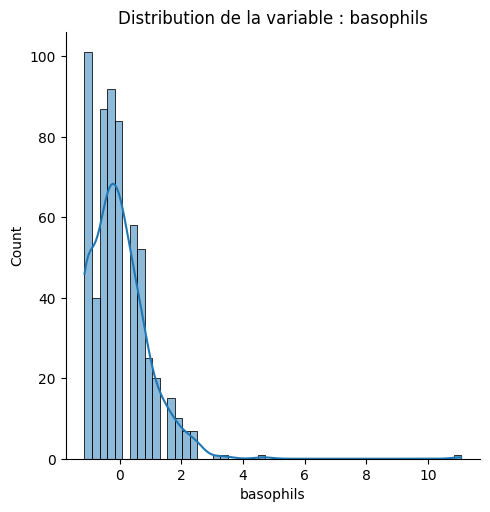

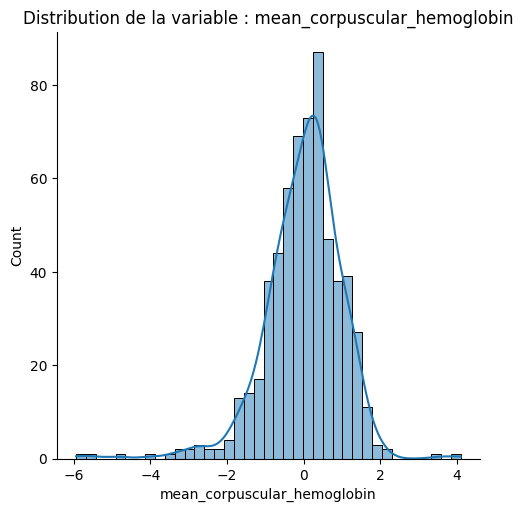

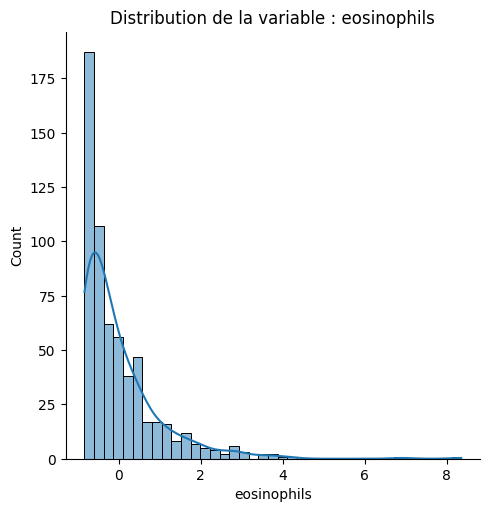

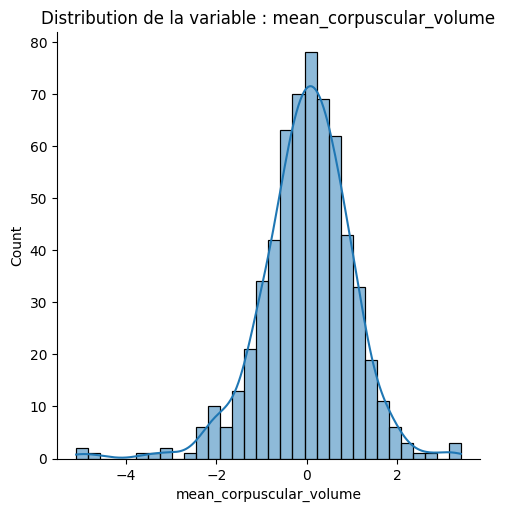

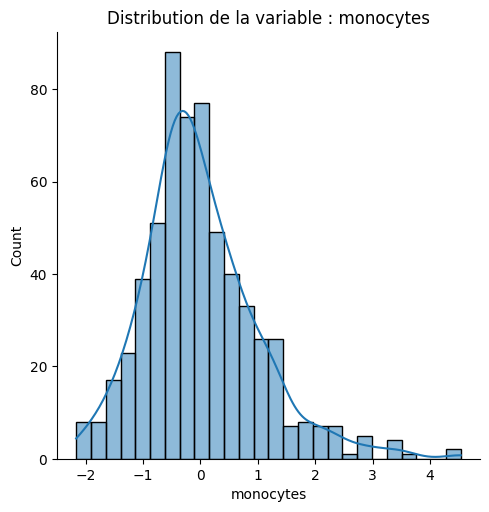

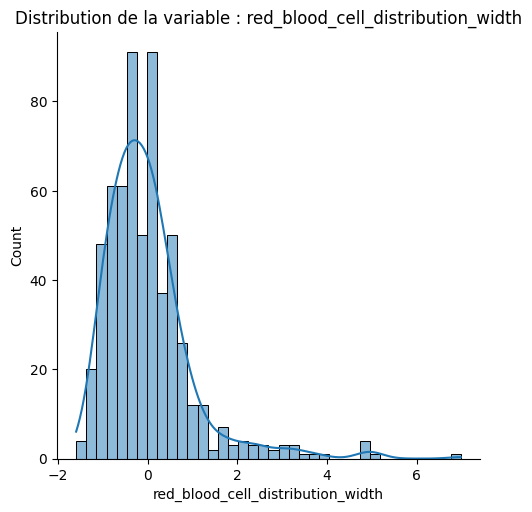

In [73]:
for col in df.select_dtypes(include='float'):
    sns.displot(df[col], kde=True)
    plt.title(f"Distribution de la variable : {col}")
    plt.show()

**Remarque :**
1. La plupart de ces variables semblent avoir été standardisées vu qu'elles sont centrés en 0 et ont à peu près un `std` égale à 1.
2. Certaines suivent une distribution normale et d'autres sont plutôt asymétriques (skewness).

On peut ici réaliser des tests de normalité, mieux Standardiser ces données et calculer le skewness

Variables booléennes (0 ou 1)

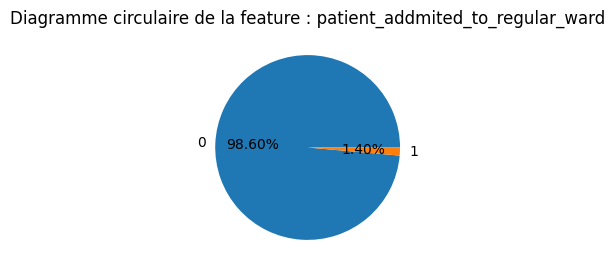

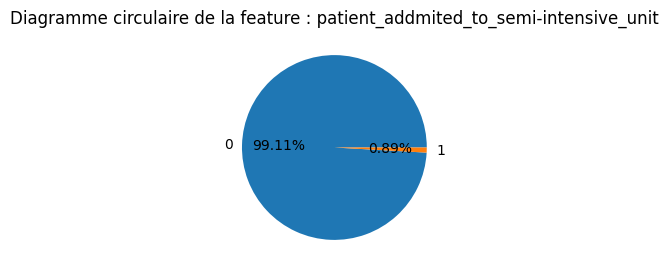

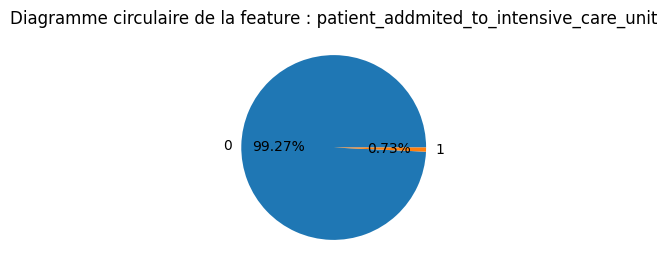

In [74]:
columns = [
    "patient_addmited_to_regular_ward",
    "patient_addmited_to_semi-intensive_unit",
    "patient_addmited_to_intensive_care_unit"
]
for col in columns:
    feature_grouped = df.groupby(col)[col].count()

    plt.figure(figsize=(3, 3))
    plt.title(f"Diagramme circulaire de la feature : {col}")
    plt.pie(x=feature_grouped.values, labels=feature_grouped.index, autopct="%.2f%%")
    plt.show()

Pour ces trois variables on a très peu de valeurs `1` donc il est possible que cette variable n'est pas d'intérêt pour notre modèle

Variables catégorielles

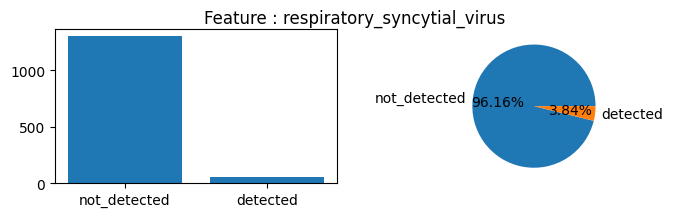

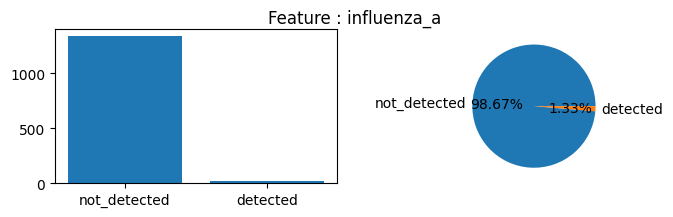

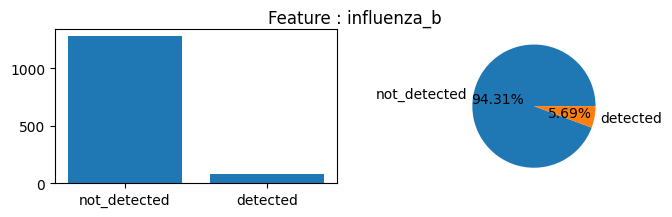

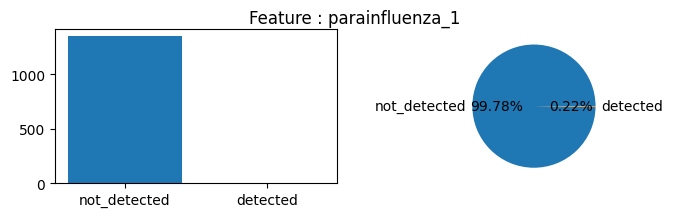

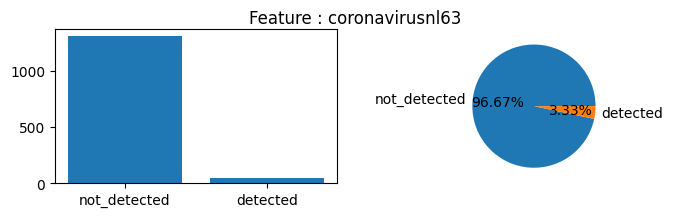

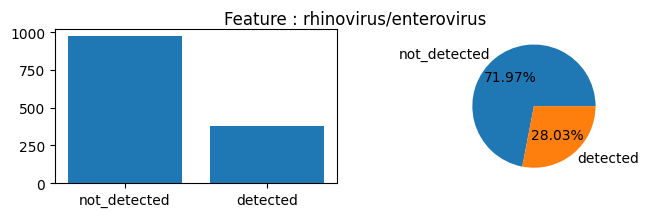

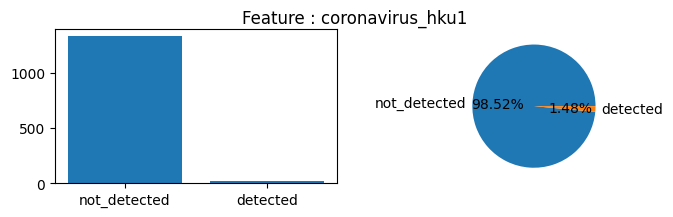

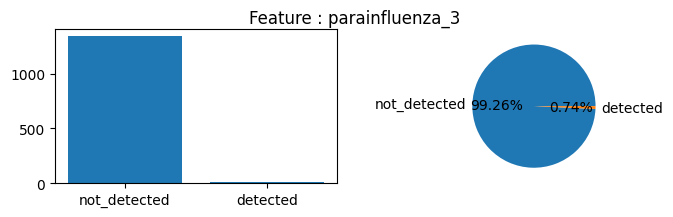

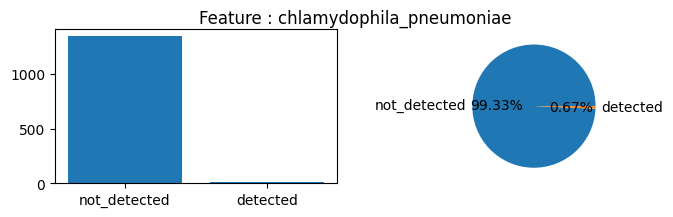

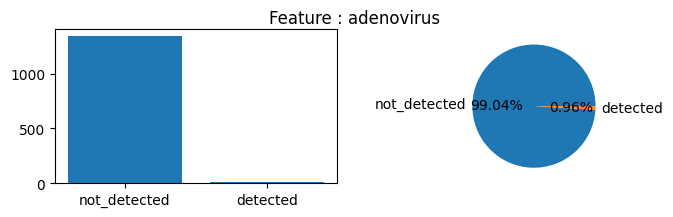

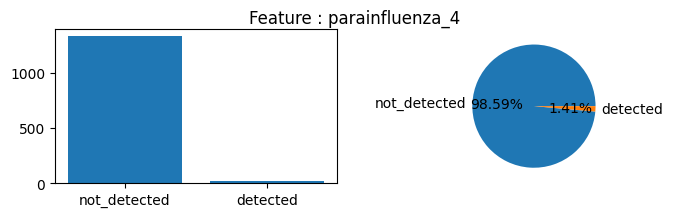

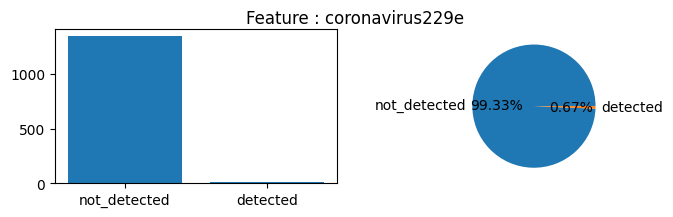

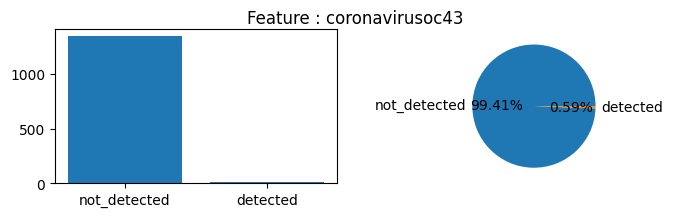

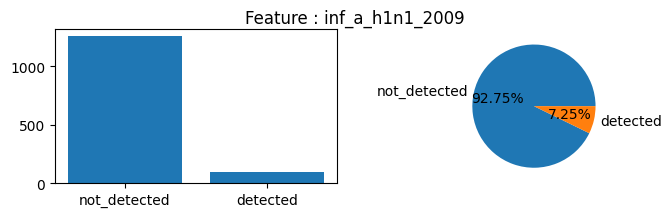

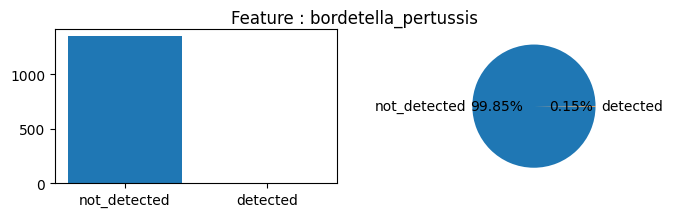

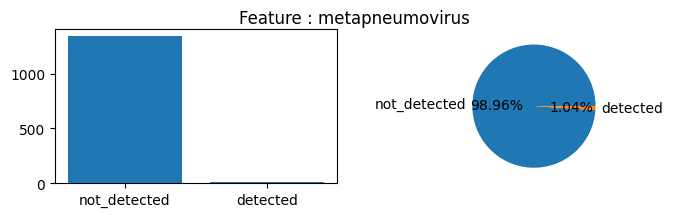

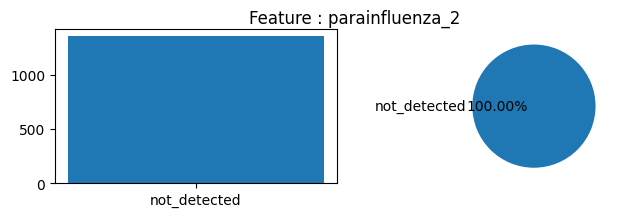

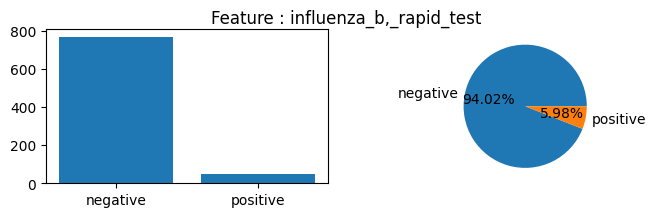

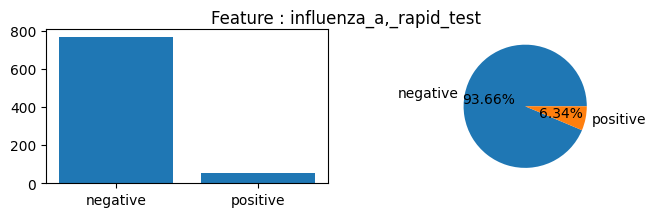

In [75]:
for col in df.select_dtypes(include='object'):
    if col == 'sars-cov-2_exam_result': continue

    feature_table = df[col].value_counts()
    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    fig.suptitle(f"Feature : {col}")
    ax[0].bar(x=feature_table.index, height=feature_table.values)
    ax[1].pie(feature_table, labels=feature_table.index, autopct="%.2f%%")
    plt.show()

- Visualisation de la target

<BarContainer object of 2 artists>

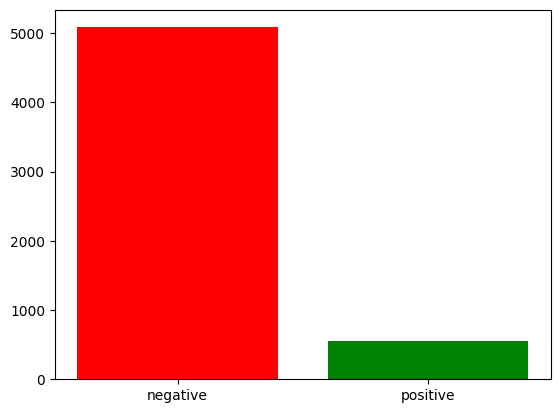

In [76]:
target = "sars-cov-2_exam_result"
target_table = df[target].value_counts()
plt.bar(x=target_table.index, height=target_table.values, color=['red', 'green'])

**Remarque :** La répartition des résultats est déséquilibrée
1. On utilisera une métrique propre pour évaluer notre modèle dans ce genre de situation
2. On utilisera une méthode adaptée pour la division du datasets, train et test set

- Relations entre Target et Features

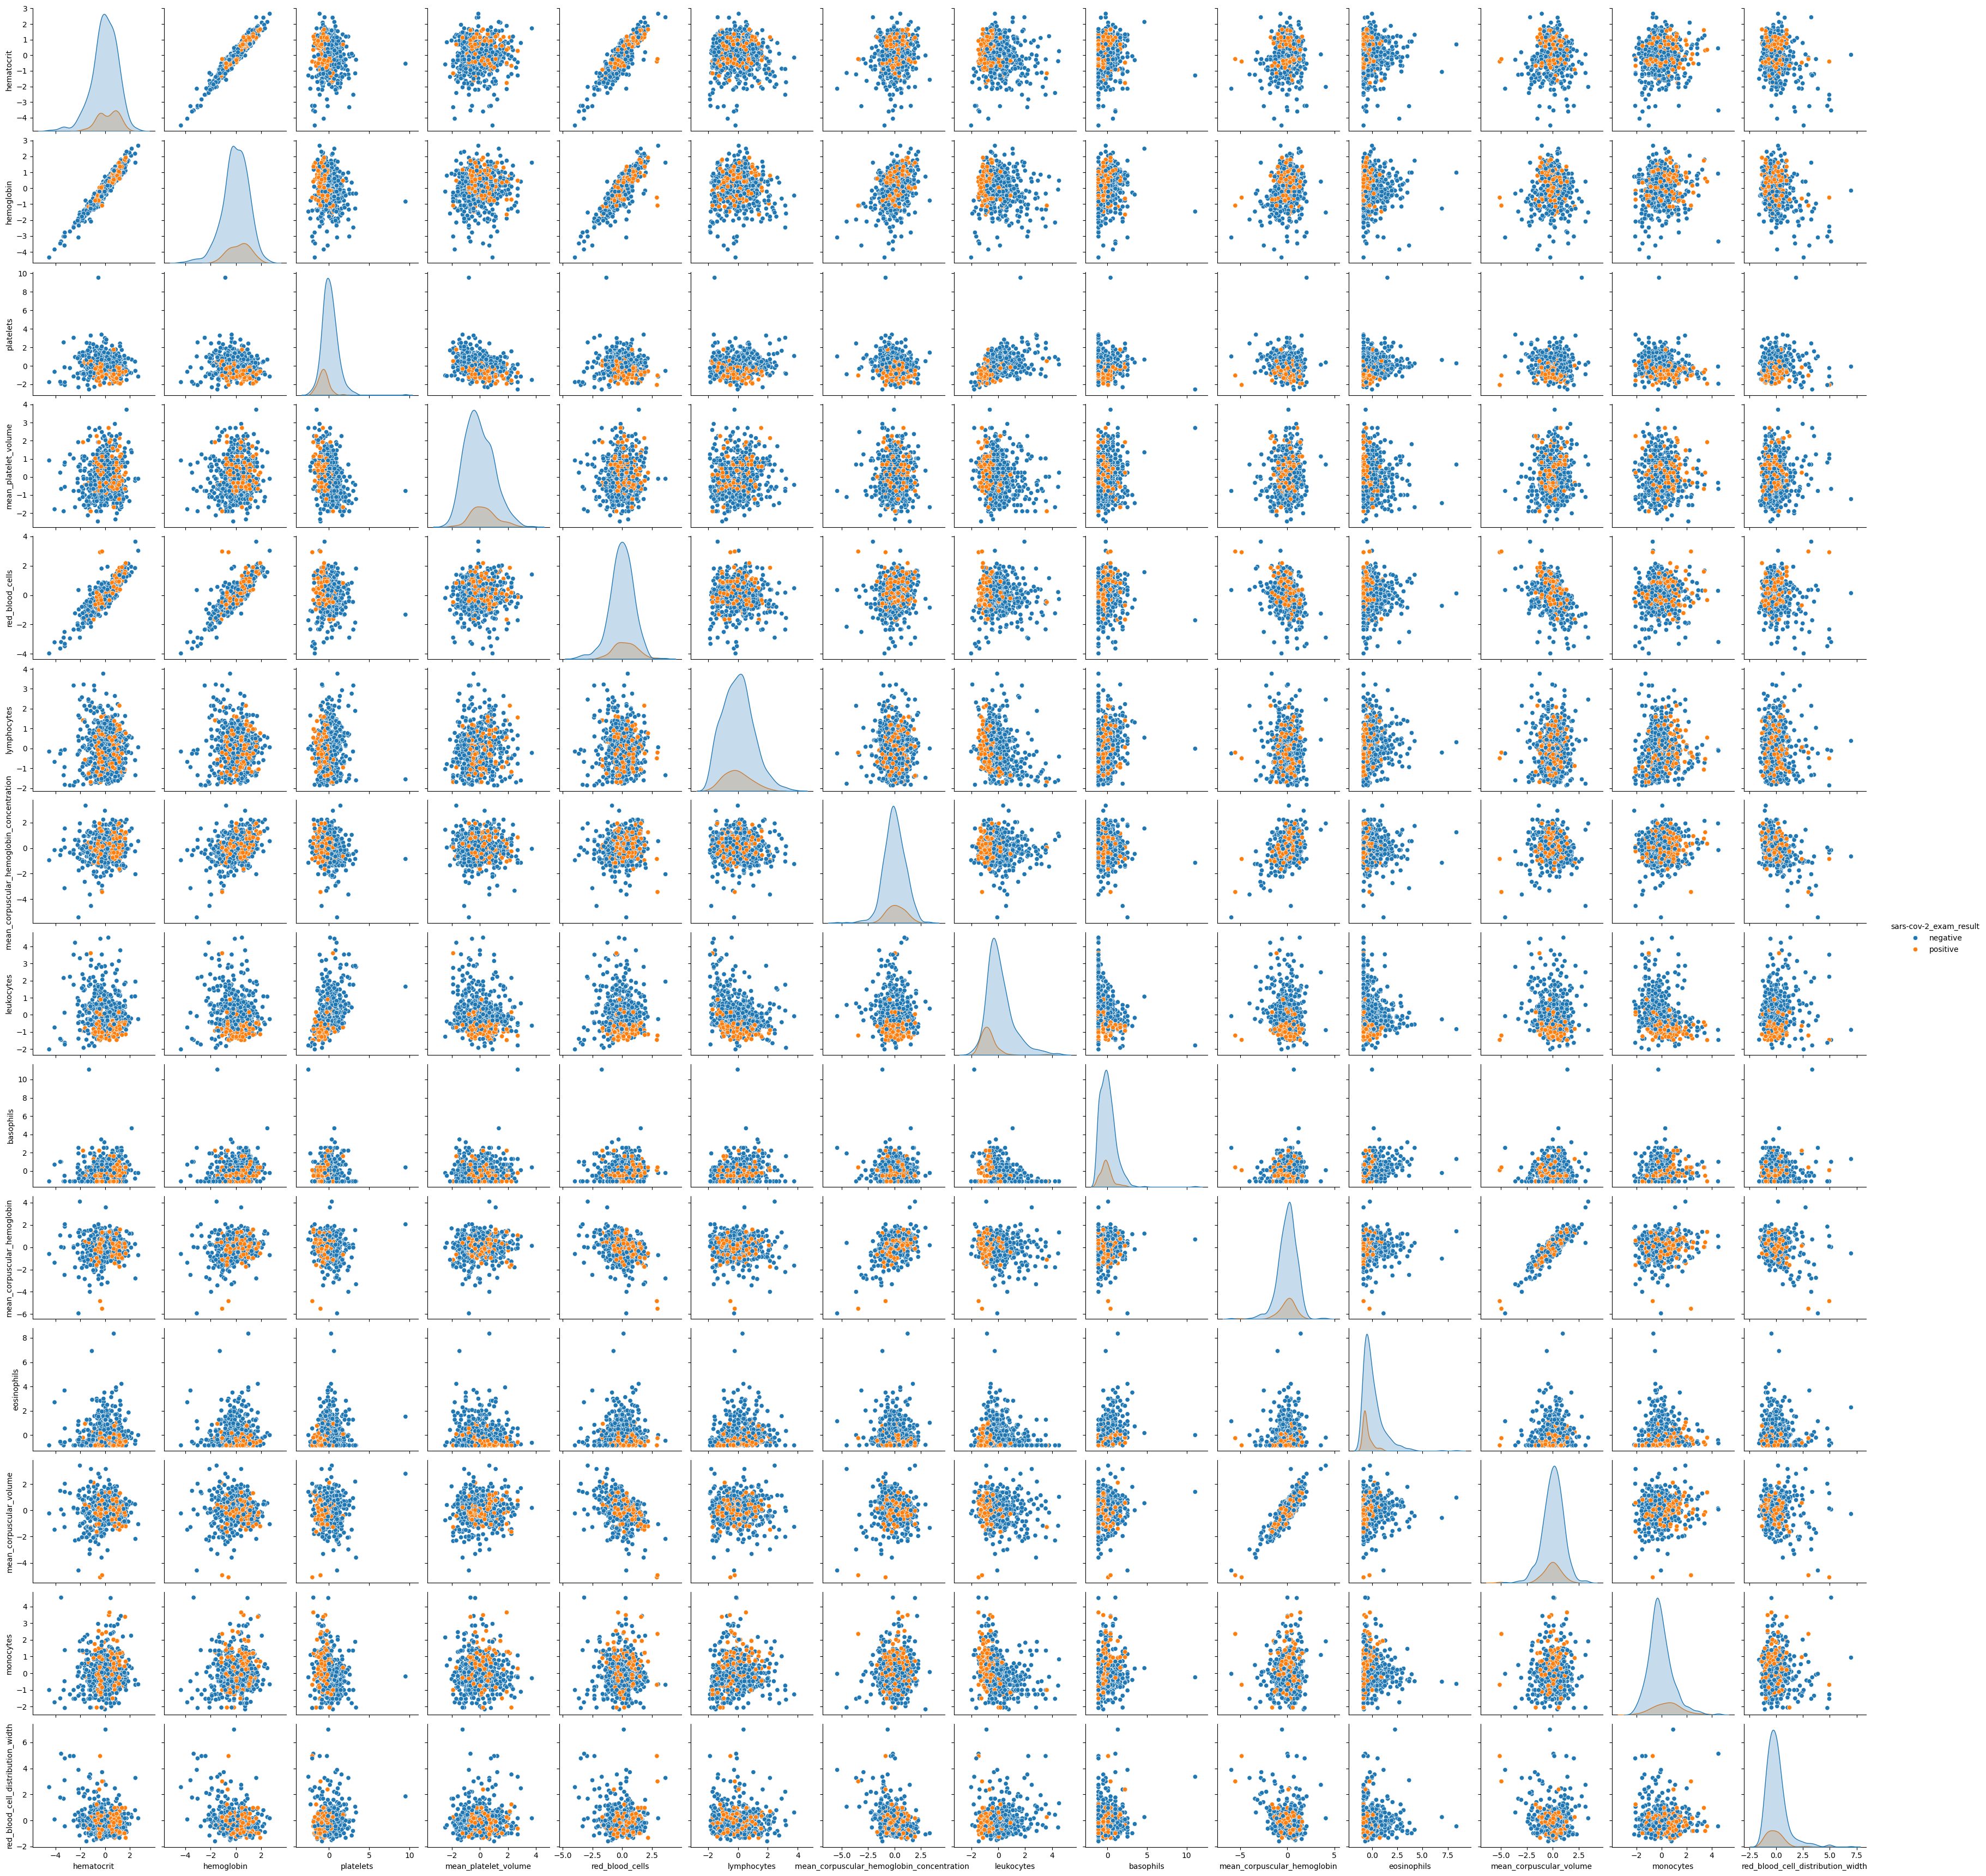

In [117]:
features_continues = df.select_dtypes(include='float').columns

sns.pairplot(data=df, x_vars=features_continues, y_vars=features_continues, hue=target)
plt.show()

### **Relations Observées :**

#### Relations Linéaire :

- hemoglobin & hematocrit & red_blood_cells
- mean_corpuscular_hemoglobin & mean_corpuscular_volume

#### Relations de Classification :

- leukocytes, platelets : ces variables semblent influencer la target, car les patients positifs semblent être regroupés vers un côté et ceux négatifs vers un autre

- Identification des Outliers

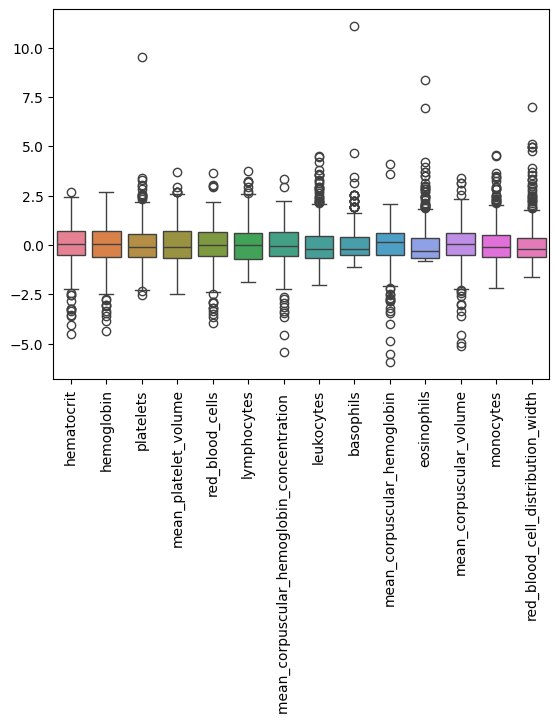

In [123]:
plt.xticks(rotation=90)
sns.boxplot(df[features_continues])
plt.show()

La distribution de ces variables est centrée en 0, mais présente beaucoup d'Outliers (à gérer lors de la normalisation).